<a href="https://colab.research.google.com/github/trish-r/102203584_Trish_Rustagi_Parameter-Optimization/blob/main/102203584_Parameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo


📋 Metadata:
 {'uci_id': 360, 'name': 'Air Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/360/air+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/360/data.csv', 'abstract': 'Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 9358, 'num_features': 15, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C59K5F', 'creators': ['Saverio Vito'], 'intro_paper': {'ID': 420, 'type': 'NATIVE', 'title': 'On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario

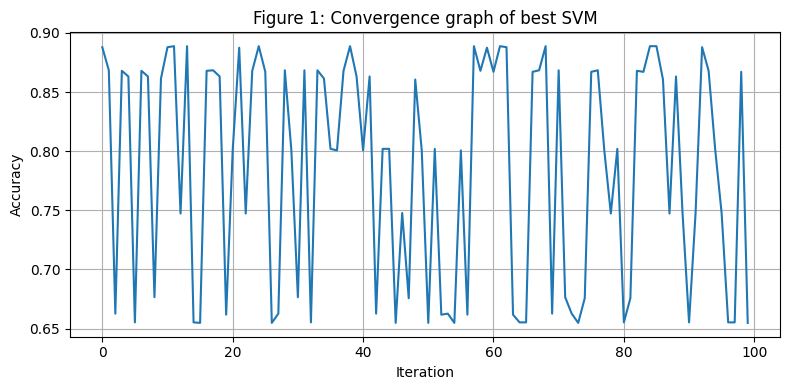


Table 1: Comparative performance of Optimized-SVM with different samples
Sample   Best Accuracy   Best SVM Parameters (Kernel, C, Gamma)
S1       87.89%          ('rbf', 10, 'scale')
S2       88.36%          ('rbf', 1, 'auto')
S3       88.02%          ('rbf', 10, 'scale')
S4       87.76%          ('rbf', 10, 'scale')
S5       88.71%          ('rbf', 10, 'auto')
S6       88.28%          ('rbf', 10, 'auto')
S7       88.23%          ('rbf', 10, 'auto')
S8       87.93%          ('rbf', 10, 'scale')
S9       88.88%          ('rbf', 10, 'scale')
S10      87.62%          ('rbf', 10, 'auto')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from ucimlrepo import fetch_ucirepo
import warnings

warnings.filterwarnings("ignore")
random.seed(42)
np.random.seed(42)

air_quality = fetch_ucirepo(id=360)

X = air_quality.data.features
y = air_quality.data.targets

print("\nMetadata:\n", air_quality.metadata)
print("\nVariables:\n", air_quality.variables)

if 'Date' in X.columns:
    X = X.drop(columns=['Date'])
if 'Time' in X.columns:
    X = X.drop(columns=['Time'])

df = pd.concat([X, y], axis=1).dropna()

df = df[df['CO(GT)'] != -200]
df['TargetClass'] = pd.qcut(df['CO(GT)'], q=3, labels=[0, 1, 2])
df = df.drop(columns=['CO(GT)'])

X = df.drop(columns=['TargetClass'])
y = df['TargetClass'].astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
Cs = [0.1, 1, 10]
gammas = ['scale', 'auto']

results = []
convergence_data = []

for sample_idx in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=sample_idx
    )

    best_acc = 0
    best_params = None
    acc_per_iter = []

    for i in range(100):
        kernel = random.choice(kernels)
        C = random.choice(Cs)
        gamma = random.choice(gammas)

        model = SVC(kernel=kernel, C=C, gamma=gamma)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        acc = accuracy_score(y_test, preds)
        acc_per_iter.append(acc)

        if acc > best_acc:
            best_acc = acc
            best_params = (kernel, C, gamma)

    results.append({
        "Sample": f"S{sample_idx+1}",
        "Best Accuracy": round(best_acc * 100, 2),
        "Best Parameters": best_params
    })

    convergence_data.append(acc_per_iter)
best_sample_idx = np.argmax([r["Best Accuracy"] for r in results])
best_convergence = convergence_data[best_sample_idx]

plt.figure(figsize=(8, 4))
plt.plot(best_convergence)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Figure 1: Convergence graph of best SVM")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nTable 1: Comparative performance of Optimized-SVM with different samples")
print("{:<8} {:<15} {}".format("Sample", "Best Accuracy", "Best SVM Parameters (Kernel, C, Gamma)"))
for r in results:
    print("{:<8} {:<15} {}".format(r["Sample"], f"{r['Best Accuracy']}%", r["Best Parameters"]))
